In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
## import pyclustertend 
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
from sklearn.compose import make_column_selector as selector #para separar columnas numéricas de categoricas

C:\Users\laury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Análisis de los datos

In [3]:
data = pd.read_csv('./train.csv', encoding = "latin1")
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

In [4]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

Kurtosis: 6.536282
Asimetría: 1.882876


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Prueba de Kolmogorov-Smirnov:
p=0.000000

Prueba de Lilliefors:
ks=0.123685
p=0.001000


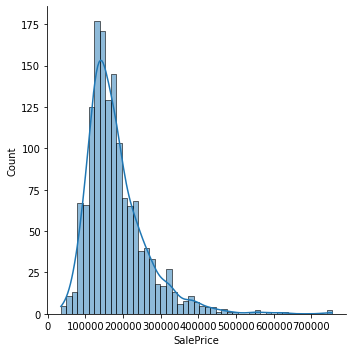

In [6]:
sns.displot(data['SalePrice'], kde=True)

In [7]:
data.fillna(0)
minPrice = data['SalePrice'].min()
maxPrice = data['SalePrice'].max()
divs = (maxPrice - minPrice) / 3
data['priceRange'] = data['LotArea']

data['priceRange'][data['SalePrice'] < minPrice + divs] = 0.0 #Economico
data['priceRange'][data['SalePrice'] >= minPrice + divs] = 1.0 #Precio medio
data['priceRange'][data['SalePrice'] >= minPrice + divs * 2] = 2.0 #Caro

C:\Users\laury\AppData\Local\Temp\ipykernel_20668\618828850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] < minPrice + divs] = 0.0 #Economico
C:\Users\laury\AppData\Local\Temp\ipykernel_20668\618828850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] >= minPrice + divs] = 1.0 #Precio medio
C:\Users\laury\AppData\Local\Temp\ipykernel_20668\618828850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [8]:
pd.set_option('display.max_columns', None) # or 1000.
pd.set_option('display.max_rows', None) # or 1000.
pd.set_option('display.max_colwidth', -1) # or 199.


C:\Users\laury\AppData\Local\Temp\ipykernel_20668\3259654922.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # or 199.


Tuneo de los datos


In [9]:
Y = data['priceRange']
X = data.drop(['priceRange', 'Id'], axis=1)
#rellenamos los datos numericos con un 0
X['PoolArea'].fillna(0, inplace=True)
X['LotFrontage'].fillna(0, inplace=True)
X['MasVnrArea'].fillna(0, inplace=True)
#quitamos las columnas que no son numericas ya que afectan los datos
X['Alley'].dropna()
X['MasVnrType'].dropna()
X['BsmtQual'].dropna()
X['BsmtCond'].dropna()
X['BsmtExposure'].dropna()
X['BsmtFinType1'].dropna()
X['BsmtFinType2'].dropna()
X['Electrical'].dropna()
X['FireplaceQu'].dropna()
X['GarageType'].dropna()
X['GarageYrBlt'].dropna()
X['GarageFinish'].dropna()
X['GarageQual'].dropna()
X['GarageCond'].dropna()
X['PoolQC'].dropna()
X['Fence'].dropna()
X['MiscFeature'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)

In [10]:
Xtrain = X_train.apply(pd.to_numeric, errors='coerce')
yTrain = y_train.apply(pd.to_numeric, errors='coerce')
Xtrain.fillna(0, inplace=True)
yTrain.fillna(0, inplace=True)
xtest = X_test.apply(pd.to_numeric, errors='coerce')
xtest.fillna(0, inplace=True)


In [11]:
selector_numericas = selector(dtype_exclude=object)
selector_categoricas = selector(dtype_include=object)
columnas_numericas = selector_numericas(X)
columnas_categoricas = selector_categoricas(X)


In [12]:
from sklearn.preprocessing import OneHotEncoder
preprocesador_cat = OneHotEncoder(handle_unknown='ignore')
preprocesador_num = StandardScaler()

from sklearn.compose import ColumnTransformer
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_cat,columnas_categoricas),
    ('standard_scaler',preprocesador_num,columnas_numericas)
])

## Primer modelo

In [13]:
from sklearn.pipeline import make_pipeline
modelo = make_pipeline(preprocesador,MLPClassifier(hidden_layer_sizes=(65,25), max_iter=200))

Modelo de redes neuronales

In [ ]:
Xtrain.fillna(0, inplace=True)
yTrain.fillna(0, inplace=True)
xtest.fillna(0, inplace=True)
modelo.fit(Xtrain,y_train)
y_pred = modelo.predict(xtest)
y_pred

In [15]:
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión
 [[395   2   0]
 [  8  30   0]
 [  0   0   3]]
Accuracy:  0.9771689497716894


Comparacion de modelos con base en la precision:
Naive Bayes = 87% 
Regresion Logistica = 85%
Support Vector machines = 96%
Redes Neuronales = 97%

# Segundo Modelo

In [25]:
from sklearn.pipeline import make_pipeline
modelo2 = make_pipeline(preprocesador,MLPClassifier(hidden_layer_sizes=(15,75), max_iter=1000))

In [26]:
modelo2.fit(Xtrain,y_train)
y_pred = modelo2.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [27]:
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión
 [[390   7   0]
 [  5  32   1]
 [  0   0   3]]
Accuracy:  0.9703196347031964


# Modelos de regresión

In [35]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(Xtrain, yTrain)
pred = regr.predict(xtest)
score = regr.score(xtest, y_test)
pred

array([ 1.38112490e+01,  7.56232076e+00,  8.78391412e+00, -1.49261910e+00,
        1.45647757e+01,  1.29370086e+01,  6.29587371e+00,  1.70095161e+00,
        1.04759657e+01, -2.56724706e+01, -4.28394093e+00,  1.44514125e+01,
       -1.35005273e+01,  1.40381620e+01,  2.21835069e+01,  2.92797410e+00,
        8.61256994e+00, -2.02891594e-01, -2.83416646e+00, -1.11386700e+01,
        1.73922686e+01,  1.28465553e+01,  2.18443817e+01,  3.17896376e+01,
       -2.10419970e+01,  1.52711461e+01,  1.08308388e+01, -1.20921239e+01,
       -4.91662379e+00, -1.75203122e+01,  3.36278748e+00,  1.02290600e+01,
        2.15029649e+01, -5.18322433e+01, -3.71668857e+00,  1.74701619e+00,
       -3.57330857e+00,  6.60445248e+00,  1.43921846e+01,  7.99576779e+00,
       -8.26731506e+00,  6.31479784e+00,  1.16461281e+01,  1.98698117e+01,
       -1.95603521e+00,  1.59328742e+01, -8.32109735e+00,  4.74962388e+00,
        4.73066745e+00, -8.19175874e+00,  1.41598892e+01, -5.19465996e+00,
        1.46218092e+01,  